Questions that will be explored and answered during the project:

1) Show me a breakdown of distance from home by job role and attrition.
2) Compare monthly average income by education and attrition 

In [ ]:
import kagglehub
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import holoviews as hv
from scipy.stats import ttest_ind


%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)


In [186]:
# Download latest version of the dataset
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")
print("Path to dataset files:", path)

# Checking which files are in the folder 
files = os.listdir(path)
print("Files in the dataset folder:", files)

# Setting up the first file to read
filename = files[0]
filepath = os.path.join(path, filename)

print("-------------------------------------------------------------------------")
print(f"Full file path: {filepath}")
print("-------------------------------------------------------------------------")
# Loading the CSV file into a dataframe
df = pd.read_csv(filepath)


Path to dataset files: /Users/matan-mac/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1
Files in the dataset folder: ['WA_Fn-UseC_-HR-Employee-Attrition.csv']
-------------------------------------------------------------------------
Full file path: /Users/matan-mac/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1/WA_Fn-UseC_-HR-Employee-Attrition.csv
-------------------------------------------------------------------------


In [187]:
# Get the dataframe from the downloaded dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [189]:
# Check for Nan values
print("Checking for NaN values in the dataframe:")
df.isna().sum()

Checking for NaN values in the dataframe:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [190]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [191]:
# Printing the number of unique values in each column
for column in df.columns:
    print(f"{column}: The number of unique values is {df[column].nunique()}")
    print("--------------------------------------------------------")

Age: The number of unique values is 43
--------------------------------------------------------
Attrition: The number of unique values is 2
--------------------------------------------------------
BusinessTravel: The number of unique values is 3
--------------------------------------------------------
DailyRate: The number of unique values is 886
--------------------------------------------------------
Department: The number of unique values is 3
--------------------------------------------------------
DistanceFromHome: The number of unique values is 29
--------------------------------------------------------
Education: The number of unique values is 5
--------------------------------------------------------
EducationField: The number of unique values is 6
--------------------------------------------------------
EmployeeCount: The number of unique values is 1
--------------------------------------------------------
EmployeeNumber: The number of unique values is 1470
-------------------

We can notice that we have 3 categories that have only 1 unique value and another category that has 1470 unique values that is the exact number of samples we have. Since we have no value of interpreting this data we will drop these columns ffrom the dataset. 

In [192]:
df.drop(['StandardHours', 'Over18', 'EmployeeNumber', 'EmployeeCount'], axis= "columns", inplace=True)

In [193]:
# For each categorical feature 
for column in df.select_dtypes(include=['object']).columns:
    print(f"Distribution of {column}:")
    print(df[column].value_counts(normalize=False))
    print("--------------------------------------------------------")


Distribution of Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
--------------------------------------------------------
Distribution of BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------------------------------
Distribution of Department:
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------------------------------
Distribution of EducationField:
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------------------------------
Distribution of Gender:
Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------------------------------------------
Distribution of JobR

## 1) Show me a breakdown of distance from home by job role and attrition

In [194]:
# Group by Attrition and DistanceFromHome, count occurrences
print("Grouping by Attrition and DistanceFromHome:")
print("--------------------------------------------------------")
grouped = df.groupby(['Attrition', 'DistanceFromHome']).size().reset_index(name='Count')
print(grouped)

# 2. Normalize: calculate percentage within each (JobRole, DistanceFromHome)
grouped['Total'] = grouped.groupby(['DistanceFromHome'])['Count'].transform('sum')
grouped['Percent'] = (grouped['Count'] / grouped['Total']) * 100

Grouping by Attrition and DistanceFromHome:
--------------------------------------------------------
   Attrition  DistanceFromHome  Count
0         No                 1    182
1         No                 2    183
2         No                 3     70
3         No                 4     55
4         No                 5     55
5         No                 6     52
6         No                 7     73
7         No                 8     70
8         No                 9     67
9         No                10     75
10        No                11     25
11        No                12     14
12        No                13     13
13        No                14     17
14        No                15     21
15        No                16     25
16        No                17     15
17        No                18     22
18        No                19     19
19        No                20     21
20        No                21     15
21        No                22     13
22        No             

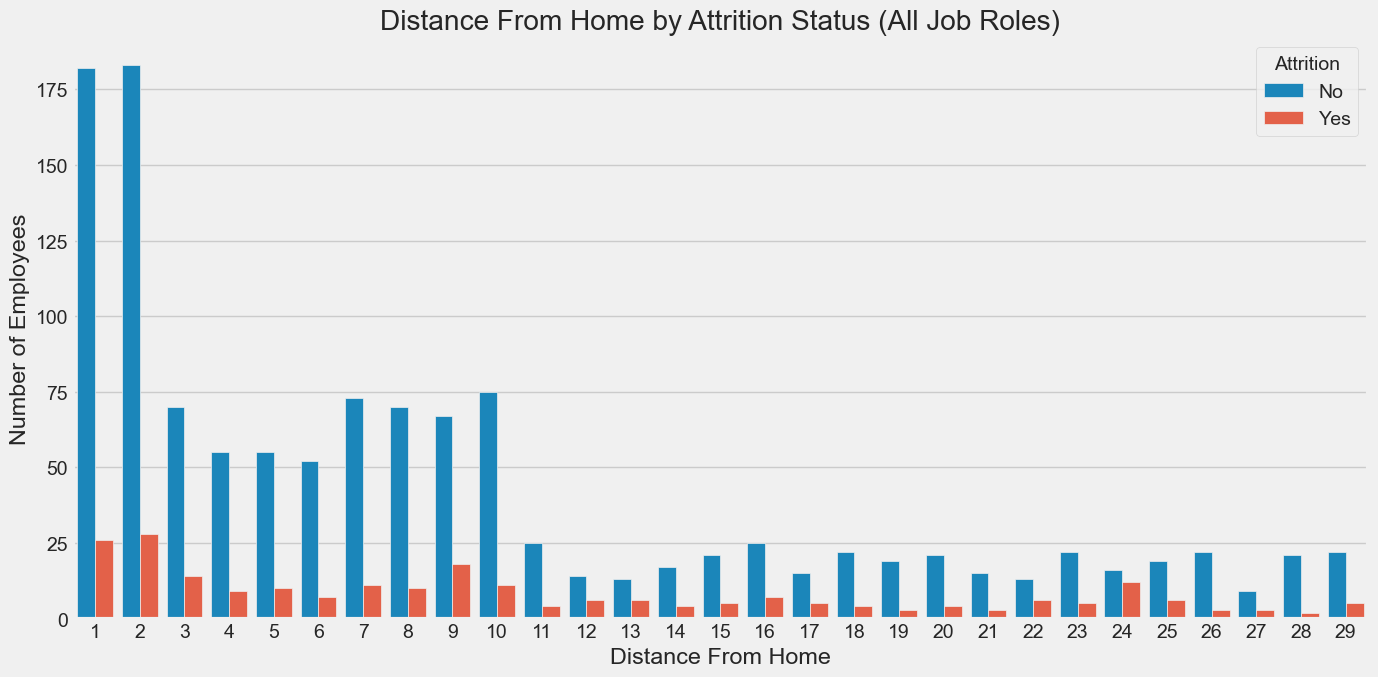

In [195]:
plt.figure(figsize=(14, 7))

# Use grouped DataFrame for plotting
sns.barplot(data=grouped, x='DistanceFromHome', y='Count', hue='Attrition', errorbar=None)

plt.title('Distance From Home by Attrition Status (All Job Roles)')
plt.xlabel('Distance From Home')
plt.ylabel('Number of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

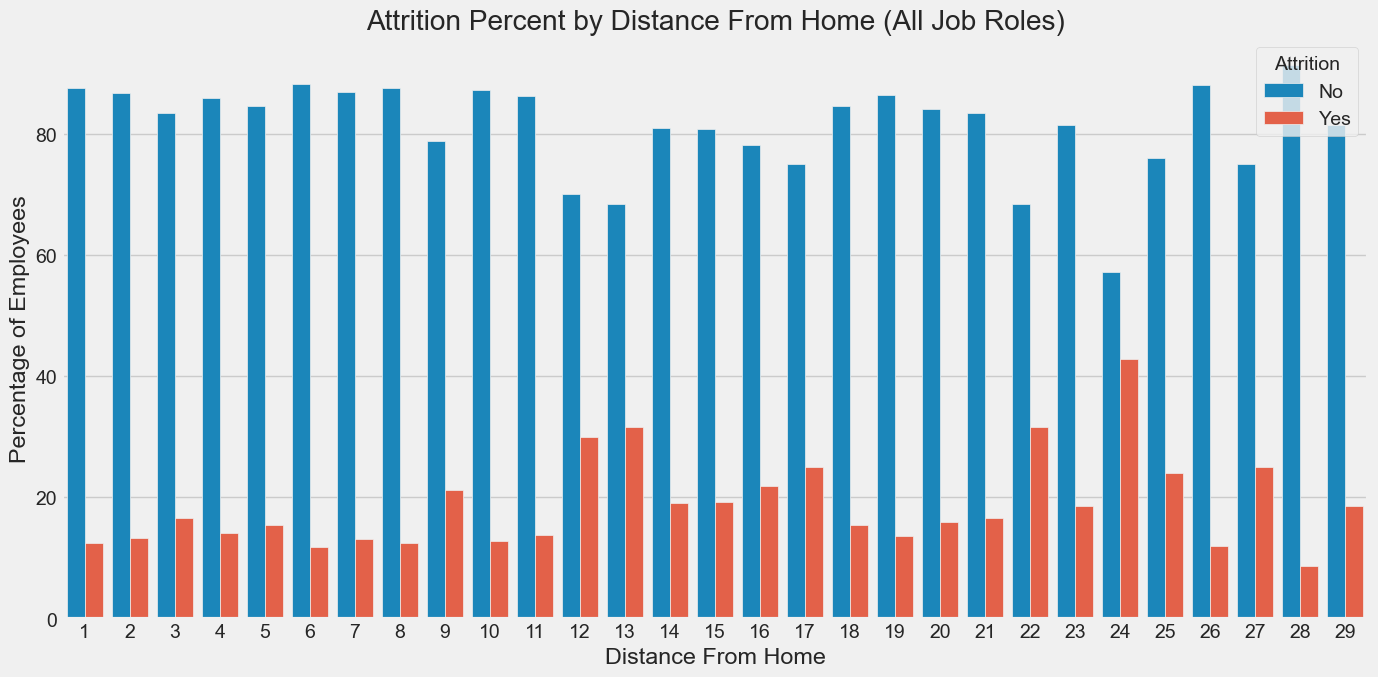

In [196]:
plt.figure(figsize=(14, 7))
sns.barplot(
    data=grouped,
    x='DistanceFromHome',
    y='Percent',
    hue='Attrition',
    errorbar=None
)

plt.title('Attrition Percent by Distance From Home (All Job Roles)')
plt.xlabel('Distance From Home')
plt.ylabel('Percentage of Employees')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()


In [197]:
print("--------------------------------------------------------")
# Show the unique values in the DistanceFromHome column
print("Unique values in DistanceFromHome column:")
print(np.sort(left_df['DistanceFromHome'].unique()))
print("--------------------------------------------------------")

# Counting the number of instances in each category from those who left the company
print("Number of instances in case of Attrition depending on Job Role:")
left_df = df[df['Attrition'] == 'Yes']
print(left_df['JobRole'].value_counts())
print("--------------------------------------------------------")

# The percentage of employees who left the company depending on their job role
print("Percentage of employees who left the company depending on their job role:")
print(left_df['JobRole'].value_counts(normalize=True) * 100)
print("--------------------------------------------------------")

# Counting the number of instances in each category from those who left the company
print("Number of instances in case of No Attrition depending on Job Role:")
stayed_df = df[df['Attrition'] == 'No']
print(stayed_df['JobRole'].value_counts())
print("--------------------------------------------------------")

# The percentage of employees who left the company out of those who did not leave
print("For each Job Role, what percentage of total employees in that role left the company?")
# Count total employees per job role
total_per_role = df['JobRole'].value_counts()
# Count how many left per job role
left_per_role = left_df['JobRole'].value_counts()
# Attrition rate = left / total
attrition_rate = (left_per_role / total_per_role) * 100
print("Attrition rate (%) per Job Role:")
print(attrition_rate.sort_values(ascending=False))



--------------------------------------------------------
Unique values in DistanceFromHome column:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
--------------------------------------------------------
Number of instances in case of Attrition depending on Job Role:
JobRole
Laboratory Technician        62
Sales Executive              57
Research Scientist           47
Sales Representative         33
Human Resources              12
Manufacturing Director       10
Healthcare Representative     9
Manager                       5
Research Director             2
Name: count, dtype: int64
--------------------------------------------------------
Percentage of employees who left the company depending on their job role:
JobRole
Laboratory Technician       26.16
Sales Executive             24.05
Research Scientist          19.83
Sales Representative        13.92
Human Resources              5.06
Manufacturing Director       4.22
Healthcare Representative

1. Bar Chart: Number of employees who left, by Job Role

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
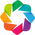

:Bars   [JobRole]   (count)

In [198]:
hv.extension('bokeh')

job_counts = left_df['JobRole'].value_counts()

job_counts.hvplot.bar(
    title='Number of Employees Who Left by Job Role',
    xlabel='Job Role',
    ylabel='Count of Attrition = Yes',
    rot=45,
    color='salmon',
    height=400,
    width=800
).opts(
    show_grid=True
)


2. Bar Chart: % of all employees who left by Job Role (within attrition group)

In [199]:
# Calculating % of attrrition cases within those who left the company 
attrition_percentage = (left_df['JobRole'].value_counts(normalize=True) * 100).sort_values(ascending=False)

attrition_percentage.hvplot.bar(
    title='Percent Distribution of Attrition by Job Role',
    xlabel='Job Role',
    ylabel=' % of Attrition cases within those who left',
    rot=45,
    color='salmon',
    height=400,
    width=800
).opts(
    show_grid=True
)

:Bars   [JobRole]   (proportion)

3. Bar Chart: True Attrition Rate per Job Role (leavers / total in the role)

In [200]:
attrition_rate = attrition_rate.sort_values(ascending=False)
attrition_rate.hvplot.bar(
    title='True Attrition Rate per Job Role (leavers / total in the role)',
    xlabel='Job Role',
    ylabel=' % of Attrition cases within those who left',
    rot=45,
    color='salmon',
    height=400,
    width=800
).opts(
    show_grid=True
)

:Bars   [JobRole]   (count)

4. Heatmap representing the count of attrition per job title and the occurences depending on distance from home

In [201]:
# Prepare the same data
heatmap_data = left_df.groupby(['JobRole', 'DistanceFromHome']).size().reset_index(name='Count')

# Create hvplot heatmap
heatmap_data.hvplot.heatmap(
    x='DistanceFromHome',
    y='JobRole',
    C='Count',
    cmap='Reds',
    colorbar=True,
    width=900,
    height=500,
    title='Attrition: Number of Employees by Job Role and Distance From Home'
).opts(
    toolbar='above',
    show_grid=True,
    xrotation=45
)

:HeatMap   [DistanceFromHome,JobRole]   (Count)

## Key Insights: Job Roles with Notable Attrition Patterns

From the attrition analysis, five job roles stand out due to high attrition volume or rate. Here's a breakdown:

From this analysis it is important to point out 5 different job roles with significant realization: 

1) Laboratory Technicians

- 62 employees left the company — the highest count among all job roles.
- This accounts for 26% of all attrition cases.
- The company currently employs 197 active Laboratory Technicians.
- The attrition rate for this role is ~24%, making it the second-highest overall — behind Sales Representatives and ahead of Human Resources.

2) Sales Executives 

- 57 employees left, representing 24% of all attrition cases — the second-highest count.
- With 269 active employees, Sales Executives make up the largest job role in the company.
- Despite their large presence, their attrition rate is ~17.5%, ranking 4th highest among all roles.

3) Research Scientists

- 47 employees left — the third-highest number overall.
- This represents ~20% of total attrition.
- Currently, the company employs 245 active Research Scientists (the second-largest role by count).
- The attrition rate is ~16%, which ranks 5th among the 9 job categories.

4) Sales Representatives 

- 33 employees left, making up ~14% of attrition cases.
- The role has only 50 active employees, one of the smallest teams in the company.
- Their attrition rate is ~40%, the highest among all roles — indicating a serious retention issue.

5) Human Resources 

- 12 employees left, comprising ~5% of total attrition.
- With just 40 current employees, HR is the smallest department in the dataset.
- The attrition rate for HR is ~23%, placing it at 3rd highest across all job roles.

Intermediate Summary

- Sales Representatives face the most critical retention challenge with a 40% attrition rate.
- Laboratory Technicians and Sales Executives contribute the most to the absolute number of employees who left.
- Human Resources and Research Scientists have above-average attrition rates that merit attention despite lower headcounts.


## How Distance From Home Influences Attrition

In [202]:
# Define the top 5 roles based on previous analysis
top_5_roles = ['Laboratory Technician', 'Sales Executive', 'Research Scientist', 'Sales Representative', 'Human Resources']

filtered_df = df[df['JobRole'].isin(top_5_roles)]
left_df = filtered_df[filtered_df['Attrition'] == 'Yes']
stayed_df = filtered_df[filtered_df['Attrition'] == 'No']

In [203]:
# Visualize Distance Distribution per Role (Attrition = Yes)

left_df.hvplot.box(
    by='JobRole',
    y='DistanceFromHome',
    title='Distance From Home for Employees Who Left (Top 5 Roles)',
    xlabel='Job Role',
    ylabel='Distance From Home',
    height=400,
    width=800,
    rot=45
)


:BoxWhisker   [JobRole]   (DistanceFromHome)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
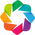

:NdOverlay   [JobRole]
   :Histogram   [DistanceFromHome]   (Count)

In [ ]:
import holoviews as hv
hv.extension('bokeh')  # Or 'plotly' if you're using that instead
from IPython.display import display
# Group by JobRole for left employees and show histograms
plot = left_df.hvplot.hist(
    y='DistanceFromHome',
    by='JobRole',       # replaces groupby
    bins=15,
    height=400,
    width=800,
    title='Distance From Home Histogram by Job Role (Attrition = Yes)'
)

plot

### Analysis of Distance Effect

A boxplot visually represents the distribution of a dataset by displaying the median, quartiles, and potential outliers.  It summarizes the data using five key values: the minimum, first quartile (Q1), median, third quartile (Q3), and maximum. 

A histogram is a graphical representation of the distribution of numerical data, where the data is grouped into ranges (bins) and the frequency of each range is represented by the hight of the bar. 

1. Sales Executives 

    The boxplot suggests that attrition among Sales Executives is slightly skewed toward longer commutes, with a median around 12 km and distances reaching the maximum of 29 km. While the histogram shows a noticeable number of departures above 10km, further comparison with employees who stayed would be needed to assess wheter distance truly plays a role in attrition. 

2. Laboratory Technicians

    The median is around 7 km. However, the histogram reveals an irregular distribution, with high counts at both short (2km) and longer distances (24 km), and gaps in between. This lack of a clear pattern suggets that distance alone may not be a strong predictor of attrition for this role. 

3. Sales Representative 

    Sales Rep who left the company tended to live closer to the office, with a median distance around 7 km and a distribution skewed towards lower values. Interestingly, this suggets that proximity did not correlate with retention for this role - though a proper comparison with those who stayed would be needed to confirm this. 

4. Research Scientist

    The median distance from home for Research Scientist who left the company is 8 km, with a distribution that is slightly skewed toward higher distances. The boxplot shows a wide spread of values and visible gaps in the lower range, suggesting that employees left from a variety of locations. While the histogram shows that some attrtion occured at longer distances, the overall pattern does not strongly suggest that distance from home alone is a driving factor. 

5. Human Resources

    Among the top five job roles analyzed, Human Resources shows the highest median distance from home at approximately 15 km, though the sample size is relatively small (12 employees). The histogram reveals a wide spread of departure distances between 6 km and 20 km, with no single distance showing more than two occurences. This indicates a more evenly distributed pattern of attrition, without clear concentration at either short or long commutes. 

For us to explore and conclude if there is a difference between the average distance between those who left and stayed we will explore the p-value and T-statistic in order to conclude if the distance had an effect over those who left and at which job title. 

In [ ]:
# Prepare a list to store results
t_test_results = []

# Loop through each job role and compute t-test
for job_role in top_5_roles:
    left_distances = left_df[left_df['JobRole'] == job_role]['DistanceFromHome']
    stayed_distances = stayed_df[stayed_df['JobRole'] == job_role]['DistanceFromHome']
    
    t_stat, p_val = ttest_ind(left_distances, stayed_distances, equal_var=False)
    
    # Append the results as a dictionary
    t_test_results.append({
        'Job Role': job_role,
        'T-Statistic': round(t_stat, 4),
        'P-Value': round(p_val, 6)
    })

# Convert the list of dicts into a DataFrame
t_test_df = pd.DataFrame(t_test_results)

# Display the table
from IPython.display import display
display(t_test_df)


,Job Role,T-Statistic,P-Value
0,Laboratory Technician,0.28,0.78
1,Sales Executive,2.84,0.01
2,Research Scientist,0.68,0.50
3,Sales Representative,-0.51,0.61
4,Human Resources,2.67,0.02


The null hypothesis: there is no statistical difference between those who stayed and left who were different due to distance from work. 

*T-Statistic*

Sales Executive (T-Stat: 2.84) and Human Resources (T-Stat: 2.67), both show positve and large standard errors apart between the means of the distance in the two groups. Suggesting that there is a difference that counters the null hypothesis.

*P-Value*

Threshold: 0.05

Results: 

Sales Executives (P-Value: 0.01) and Human Resources (P-Value: 0.02) show statistically significant differences in distance from home between employees who stayed and those who left, as both values are below 5% significance threshold. This suggests the commute distacne have played a role in attrition for these two job roles. 
However, it is important to note that attrition is often influenced by multiple factors, including job satisfaction, compenstation, workplace relationships, and personal circumstances. While the data indicates that distance from home is associated with attrition in these cases, it should not be interpreted as the sole casue. 

Conclusion:

While there are 5 Job Titles that showed high attrition rates than others, from the 5 there are two that showed strong significance to distance from home: Sales Executives and Human Resources. Both had a median higher than 10 Km, suggesting that reducing the median might reduce the probabilty of an attrition occurance in those job titles. 





# Comparison of Average Monthly Income by Education and Attrition

In [232]:
df_In_Ed = df[['Education', 'MonthlyIncome', 'Attrition']]
df_In_Ed

,Education,MonthlyIncome,Attrition
0,2,5993,Yes
1,1,5130,No
2,2,2090,Yes
3,4,2909,No
4,1,3468,No
...,...,...,...
1465,2,2571,No
1466,1,9991,No
1467,3,6142,No
1468,3,5390,No
